In [6]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

In [7]:
datapath="/cluster/project/hilliges/mbressieux/log/plate_novel_view"

d_xyz=np.load(os.path.join(datapath,"d_xyz_19001.npy")) #size Bxnb_gaussx3
fid=np.load(os.path.join(datapath,"fid_19001.npy")) #size Bx1
means3D=np.load(os.path.join(datapath,"means3D_19001.npy")) #size Bxnb_gaussx3

print(d_xyz.shape)
print(fid.shape)
print(means3D.shape)

ordered_idx=np.argsort(fid,axis=0)
fid=fid[ordered_idx]
d_xyz=d_xyz[ordered_idx]
means3D=means3D[ordered_idx]

d_xyz=d_xyz.reshape(d_xyz.shape[0],-1,3)
means3D=means3D.reshape(d_xyz.shape[0],-1,3)




(99, 342309)
(99, 1)
(99, 342309)


Shape of the displacement data: (114103, 3)


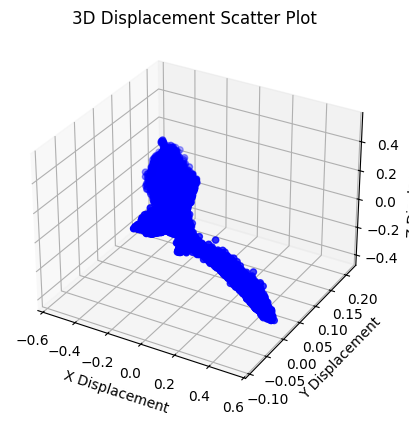

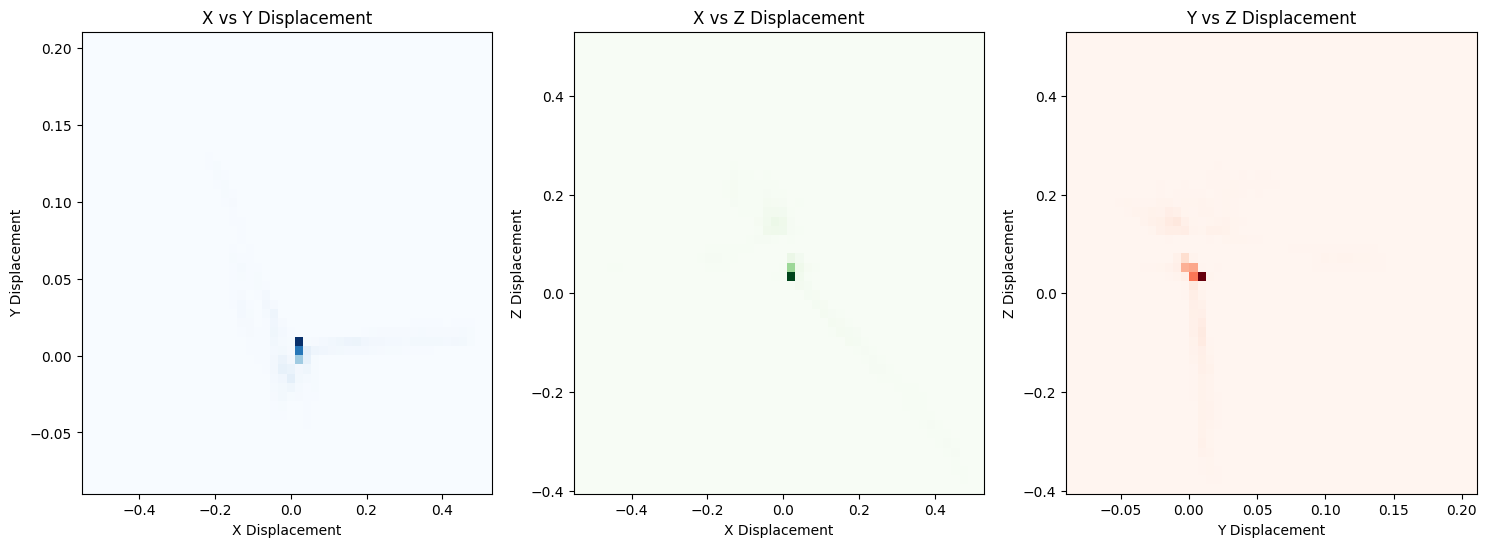

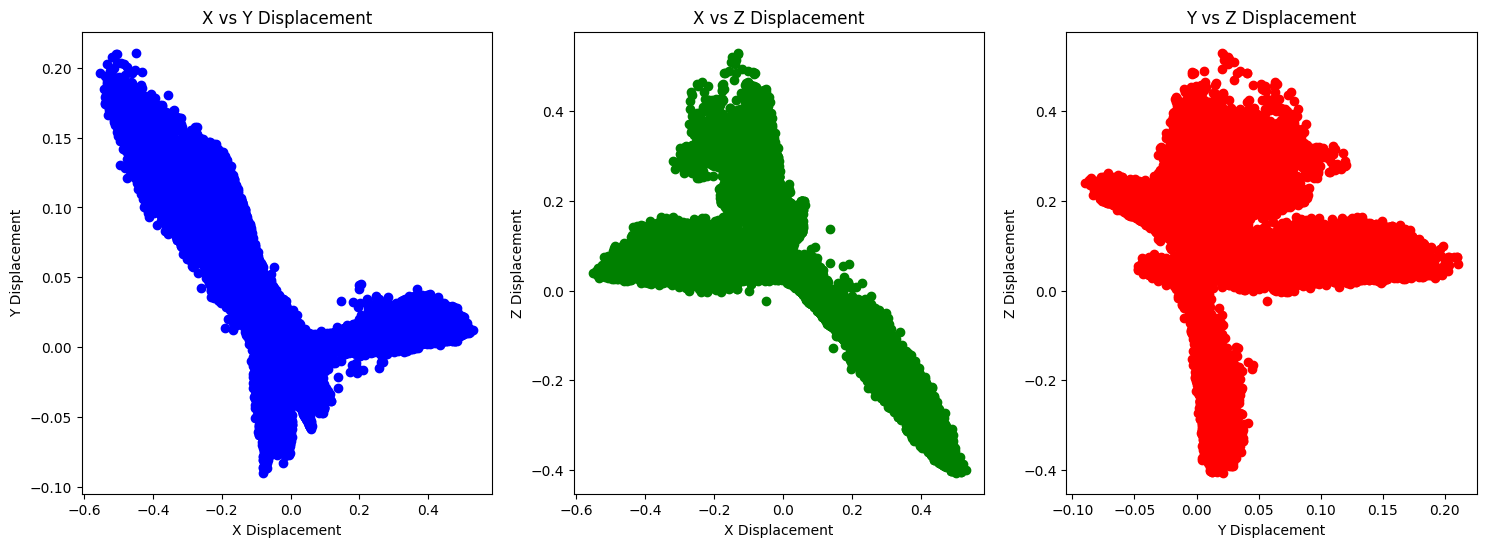

In [8]:


# Load the displacement data
#displacement_data = np.load('displacement.npy')
displacement_data = d_xyz[25]

# Check the shape of the loaded data to ensure it's correct
print("Shape of the displacement data:", displacement_data.shape)

# Extract X, Y, Z displacements
X_displacement = displacement_data[:, 0]
Y_displacement = displacement_data[:, 1]
Z_displacement = displacement_data[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_displacement, Y_displacement, Z_displacement, c='b', marker='o')

ax.set_title('3D Displacement Scatter Plot')
ax.set_xlabel('X Displacement')
ax.set_ylabel('Y Displacement')
ax.set_zlabel('Z Displacement')

plt.show()

# Create 2D histograms to analyze distribution of displacements in pairs of dimensions
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# X vs Y displacement
axs[0].hist2d(X_displacement, Y_displacement, bins=50, cmap='Blues')
axs[0].set_title('X vs Y Displacement')
axs[0].set_xlabel('X Displacement')
axs[0].set_ylabel('Y Displacement')

# X vs Z displacement
axs[1].hist2d(X_displacement, Z_displacement, bins=50, cmap='Greens')
axs[1].set_title('X vs Z Displacement')
axs[1].set_xlabel('X Displacement')
axs[1].set_ylabel('Z Displacement')

# Y vs Z displacement
axs[2].hist2d(Y_displacement, Z_displacement, bins=50, cmap='Reds')
axs[2].set_title('Y vs Z Displacement')
axs[2].set_xlabel('Y Displacement')
axs[2].set_ylabel('Z Displacement')

plt.show()


#Show 3 2D scatterplot

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# X vs Y displacement
axs[0].scatter(X_displacement, Y_displacement, c='b', marker='o')
axs[0].set_title('X vs Y Displacement')
axs[0].set_xlabel('X Displacement')
axs[0].set_ylabel('Y Displacement')

# X vs Z displacement
axs[1].scatter(X_displacement, Z_displacement, c='g', marker='o')
axs[1].set_title('X vs Z Displacement')
axs[1].set_xlabel('X Displacement')
axs[1].set_ylabel('Z Displacement')

# Y vs Z displacement
axs[2].scatter(Y_displacement, Z_displacement, c='r', marker='o')
axs[2].set_title('Y vs Z Displacement')
axs[2].set_xlabel('Y Displacement')
axs[2].set_ylabel('Z Displacement')



plt.show()


In [9]:
# get some general statistics
print("X Displacement Statistics:")
print("Mean:", np.mean(X_displacement))
print("Standard Deviation:", np.std(X_displacement))
print("Min:", np.min(X_displacement))
print("Max:", np.max(X_displacement))

print("\nY Displacement Statistics:")
print("Mean:", np.mean(Y_displacement))
print("Standard Deviation:", np.std(Y_displacement))
print("Min:", np.min(Y_displacement))
print("Max:", np.max(Y_displacement))

print("\nZ Displacement Statistics:")
print("Mean:", np.mean(Z_displacement))
print("Standard Deviation:", np.std(Z_displacement))
print("Min:", np.min(Z_displacement))
print("Max:", np.max(Z_displacement))




X Displacement Statistics:
Mean: 0.030861638
Standard Deviation: 0.15204456
Min: -0.5527803
Max: 0.53086835

Y Displacement Statistics:
Mean: 0.0124871
Standard Deviation: 0.033062942
Min: -0.08989078
Max: 0.21079347

Z Displacement Statistics:
Mean: 0.038832378
Standard Deviation: 0.12407317
Min: -0.40602857
Max: 0.53000075


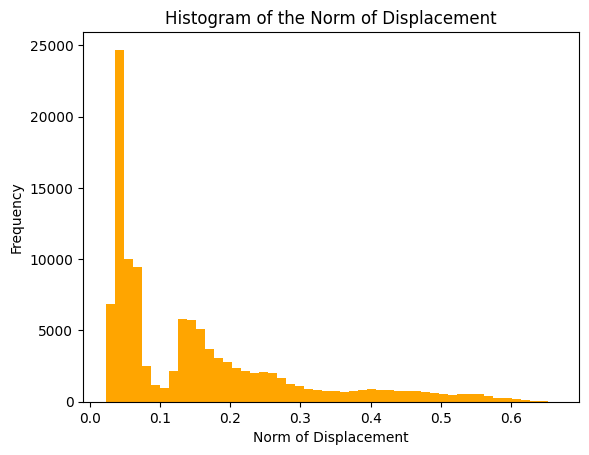

In [10]:
norm_displacement = np.sqrt(X_displacement**2 + Y_displacement**2 + Z_displacement**2)

#get histogram of the norm of the displacement
fig, ax = plt.subplots()
ax.hist(norm_displacement, bins=50, color='orange')
ax.set_title('Histogram of the Norm of Displacement')
ax.set_xlabel('Norm of Displacement')
ax.set_ylabel('Frequency')
plt.show()


Shape of the means3D data: (114103, 3)


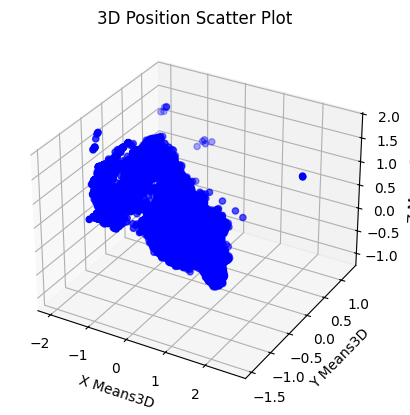

In [11]:
#plot 3D scatter plot of the means3D
means3D_data = means3D[25]

# Check the shape of the loaded data to ensure it's correct
print("Shape of the means3D data:", means3D_data.shape)

# Extract X, Y, Z displacements
X_means3D = means3D_data[:, 0]
Y_means3D = means3D_data[:, 1]
Z_means3D = means3D_data[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_means3D, Y_means3D, Z_means3D, c='b', marker='o')

ax.set_title('3D Position Scatter Plot')
ax.set_xlabel('X Means3D')
ax.set_ylabel('Y Means3D')
ax.set_zlabel('Z Means3D')

plt.show()